<a href="https://colab.research.google.com/github/JonathanJuradoS/TecnicasBusqueda/blob/main/Laberinto10x10_Busqueda_Algoritmos_Resuelto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🤖 Laberinto 10x10 – Comparación de Algoritmos de Búsqueda
Este notebook implementa y compara 4 algoritmos clásicos:
- Búsqueda en Anchura (BFS)
- Búsqueda en Profundidad (DFS)
- Hill Climbing
- A*

Aplicados sobre un laberinto 10x10 con obstáculos.

In [1]:

import matplotlib.pyplot as plt
import numpy as np
from collections import deque
import heapq

maze = [
    [0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 1, 0, 1, 1, 1, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
    [1, 1, 1, 1, 0, 1, 1, 1, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 1, 1, 0],
    [0, 1, 0, 0, 1, 1, 0, 0, 1, 0],
    [0, 1, 1, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 1, 1, 1, 0, 1, 0, 1],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
]

start = (0, 0)
goal = (9, 9)


In [2]:

def draw_path(maze, path, title):
    rows, cols = len(maze), len(maze[0])
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xlim(0, cols)
    ax.set_ylim(0, rows)
    ax.set_xticks(np.arange(0, cols + 1, 1))
    ax.set_yticks(np.arange(0, rows + 1, 1))
    ax.grid(True)
    ax.set_title(title)

    for i in range(rows):
        for j in range(cols):
            if maze[i][j] == 1:
                ax.add_patch(plt.Rectangle((j, rows - i - 1), 1, 1, color='black'))
            else:
                ax.add_patch(plt.Rectangle((j, rows - i - 1), 1, 1, edgecolor='gray', facecolor='white'))

    for i, j in path:
        ax.add_patch(plt.Rectangle((j, rows - i - 1), 1, 1, color='lightblue'))

    si, sj = path[0]
    gi, gj = path[-1]
    ax.add_patch(plt.Rectangle((sj, rows - si - 1), 1, 1, color='green'))
    ax.add_patch(plt.Rectangle((gj, rows - gi - 1), 1, 1, color='orange'))
    ax.text(sj + 0.25, rows - si - 0.75, 'A', fontsize=14, color='white')
    ax.text(gj + 0.25, rows - gi - 0.75, 'S', fontsize=14, color='black')
    plt.tight_layout()
    plt.show()


In [3]:
def heuristic(a, b): return abs(a[0] - b[0]) + abs(a[1] - b[1])

## 🔍 Algoritmo BFS

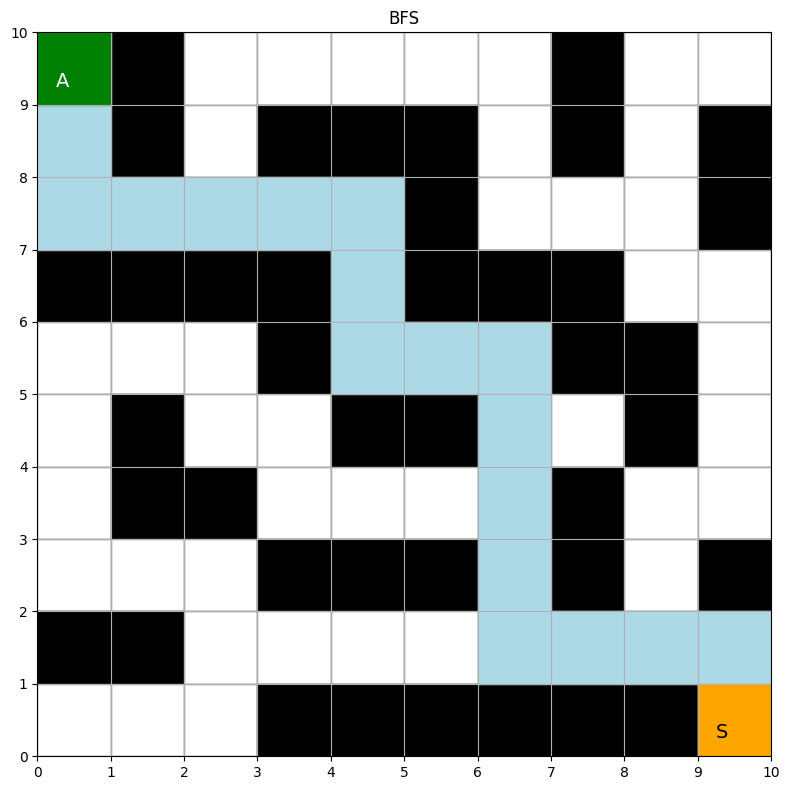

In [4]:
queue = deque([start])
came_from = {start: None}
visited = set([start])
while queue:
    current = queue.popleft()
    if current == goal: break
    for dx, dy in [(-1,0), (1,0), (0,-1), (0,1)]:
        ni, nj = current[0] + dx, current[1] + dy
        n = (ni, nj)
        if 0 <= ni < len(maze) and 0 <= nj < len(maze[0]) and maze[ni][nj] == 0 and n not in visited:
            queue.append(n)
            visited.add(n)
            came_from[n] = current
path_bfs = []
cur = goal
while cur: path_bfs.append(cur); cur = came_from.get(cur)
path_bfs.reverse()
draw_path(maze, path_bfs, 'BFS')

### ✅ Conclusión BFS
- Evaluar la eficiencia, completitud y calidad de la ruta para el algoritmo **BFS**.
- Comparar con los demás algoritmos.

## 🔍 Algoritmo DFS

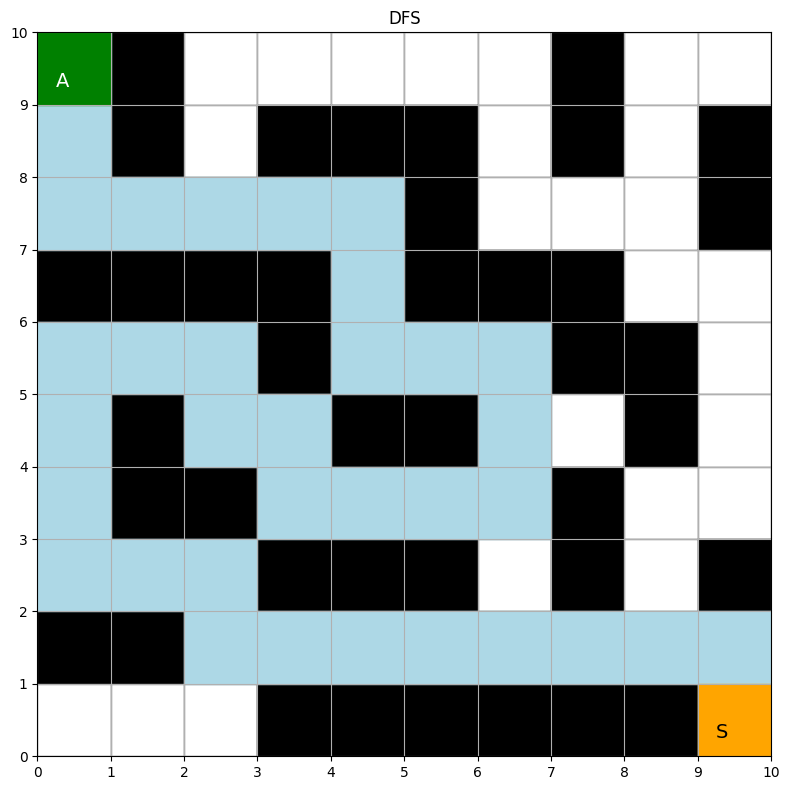

In [5]:
stack = [start]
came_from = {start: None}
visited = set([start])
while stack:
    current = stack.pop()
    if current == goal: break
    for dx, dy in [(-1,0), (1,0), (0,-1), (0,1)]:
        ni, nj = current[0] + dx, current[1] + dy
        n = (ni, nj)
        if 0 <= ni < len(maze) and 0 <= nj < len(maze[0]) and maze[ni][nj] == 0 and n not in visited:
            stack.append(n)
            visited.add(n)
            came_from[n] = current
path_dfs = []
cur = goal
while cur: path_dfs.append(cur); cur = came_from.get(cur)
path_dfs.reverse()
draw_path(maze, path_dfs, 'DFS')

### ✅ Conclusión DFS
- Evaluar la eficiencia, completitud y calidad de la ruta para el algoritmo **DFS**.
- Comparar con los demás algoritmos.

## 🔍 Algoritmo Hill Climbing

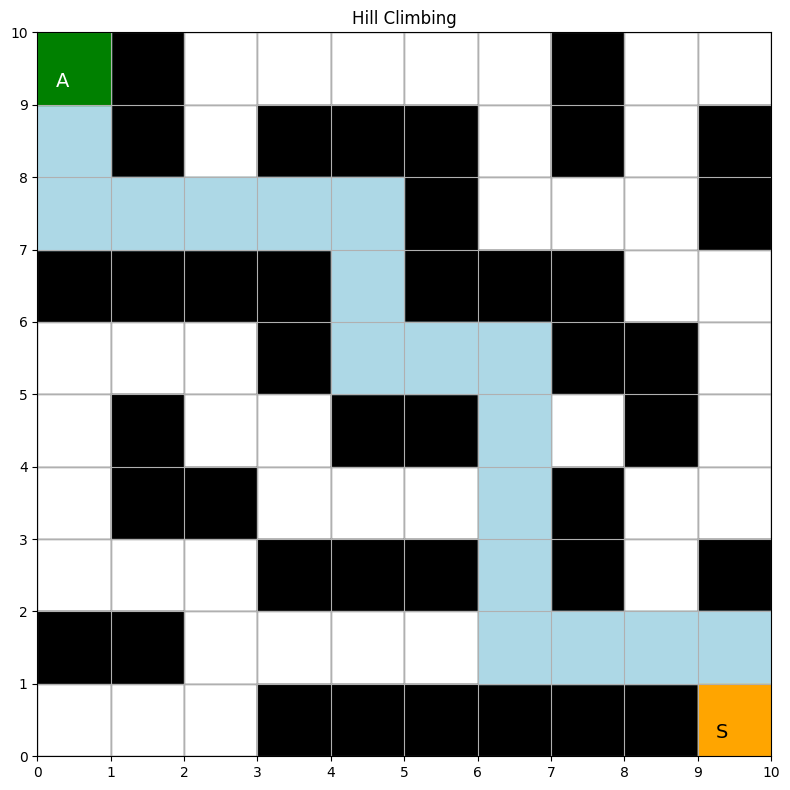

In [6]:
current = start
path_hill = [current]
visited = set([current])
while current != goal:
    neighbors = []
    for dx, dy in [(-1,0), (1,0), (0,-1), (0,1)]:
        ni, nj = current[0] + dx, current[1] + dy
        n = (ni, nj)
        if 0 <= ni < len(maze) and 0 <= nj < len(maze[0]) and maze[ni][nj] == 0 and n not in visited:
            neighbors.append(n)
    if not neighbors: break
    neighbors.sort(key=lambda x: heuristic(x, goal))
    best = neighbors[0]
    if heuristic(best, goal) >= heuristic(current, goal): break
    current = best
    visited.add(current)
    path_hill.append(current)
draw_path(maze, path_hill, 'Hill Climbing')

### ✅ Conclusión Hill Climbing
- Evaluar la eficiencia, completitud y calidad de la ruta para el algoritmo **Hill Climbing**.
- Comparar con los demás algoritmos.

## 🔍 Algoritmo A*

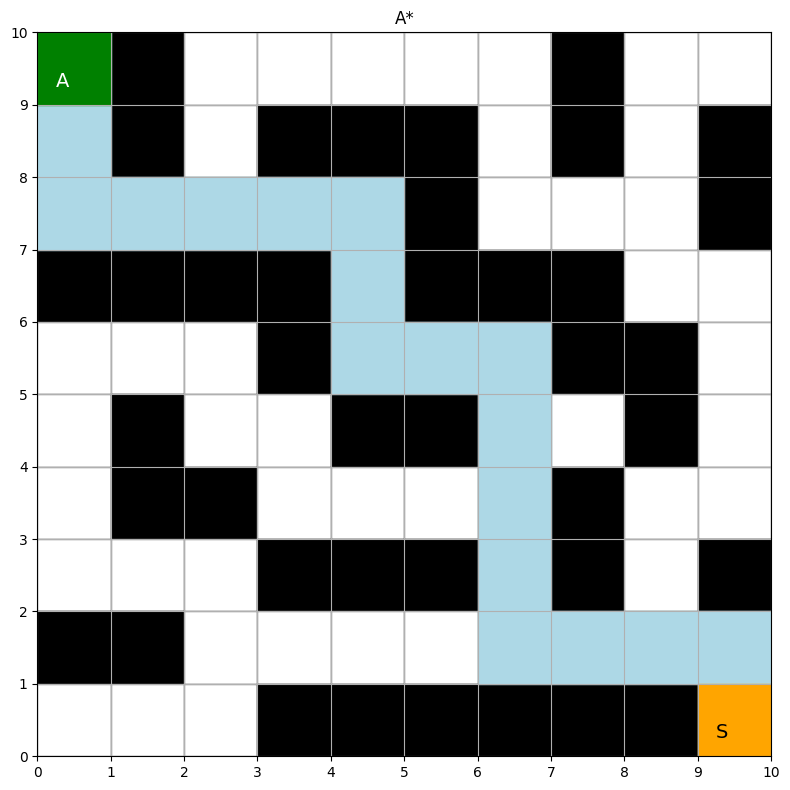

In [7]:
open_set = [(heuristic(start, goal), 0, start)]
came_from = {start: None}
g_score = {start: 0}
while open_set:
    _, cost, current = heapq.heappop(open_set)
    if current == goal: break
    for dx, dy in [(-1,0), (1,0), (0,-1), (0,1)]:
        ni, nj = current[0] + dx, current[1] + dy
        neighbor = (ni, nj)
        if 0 <= ni < len(maze) and 0 <= nj < len(maze[0]) and maze[ni][nj] == 0:
            tentative_g = g_score[current] + 1
            if neighbor not in g_score or tentative_g < g_score[neighbor]:
                g_score[neighbor] = tentative_g
                f = tentative_g + heuristic(neighbor, goal)
                heapq.heappush(open_set, (f, tentative_g, neighbor))
                came_from[neighbor] = current
path_astar = []
cur = goal
while cur: path_astar.append(cur); cur = came_from.get(cur)
path_astar.reverse()
draw_path(maze, path_astar, 'A*')

### ✅ Conclusión A*
- Evaluar la eficiencia, completitud y calidad de la ruta para el algoritmo **A***.
- Comparar con los demás algoritmos.